In [1]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import chi2_contingency

In [2]:
#Reading train and test data
train=pd.read_csv("train.csv", index_col="ID")
test=pd.read_csv("test.csv", index_col="ID")

In [3]:
train_length=train.shape
test_length=test.shape

In [4]:
train_length

(9527, 22)

In [5]:
test_length

(5045, 21)

In [6]:
train.head()

,Office_PIN,Application_Receipt_Date,Applicant_City_PIN,Applicant_Gender,Applicant_BirthDate,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_DOJ,Manager_Joining_Designation,...,Manager_Status,Manager_Gender,Manager_DoB,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced
ID,,,,,,,,,,,,,,,,,,,,,
FIN1000001,842001,4/16/2007,844120.0,M,12/19/1971,M,Others,Graduate,11/10/2005,Level 1,...,Confirmation,M,2/17/1978,2.0,1.0,335249.0,28.0,335249.0,28.0,0
FIN1000002,842001,4/16/2007,844111.0,M,2/17/1983,S,Others,Class XII,11/10/2005,Level 1,...,Confirmation,M,2/17/1978,2.0,1.0,335249.0,28.0,335249.0,28.0,1
FIN1000003,800001,4/16/2007,844101.0,M,1/16/1966,M,Business,Class XII,5/27/2006,Level 1,...,Confirmation,M,3/3/1969,0.0,0.0,357184.0,24.0,357184.0,24.0,0
FIN1000004,814112,4/16/2007,814112.0,M,2/3/1988,S,Salaried,Class XII,8/21/2003,Level 1,...,Confirmation,F,8/14/1978,0.0,0.0,318356.0,22.0,318356.0,22.0,0
FIN1000005,814112,4/16/2007,815351.0,M,7/4/1985,M,Others,Class XII,5/8/2006,Level 1,...,Confirmation,M,2/7/1971,2.0,1.0,230402.0,17.0,230402.0,17.0,0


In [7]:
train.dtypes

Office_PIN                       int64
Application_Receipt_Date        object
Applicant_City_PIN             float64
Applicant_Gender                object
Applicant_BirthDate             object
Applicant_Marital_Status        object
Applicant_Occupation            object
Applicant_Qualification         object
Manager_DOJ                     object
Manager_Joining_Designation     object
Manager_Current_Designation     object
Manager_Grade                  float64
Manager_Status                  object
Manager_Gender                  object
Manager_DoB                     object
Manager_Num_Application        float64
Manager_Num_Coded              float64
Manager_Business               float64
Manager_Num_Products           float64
Manager_Business2              float64
Manager_Num_Products2          float64
Business_Sourced                 int64
dtype: object

In [8]:
#chi2_contingency(pd.crosstab(train['Manager_Gender'], train['Business_Sourced']))
#use this for bivariate analysis

In [9]:
# This is not required, judt did it to make the data more readable

label_encoding = {
    'Applicant_Gender': {'M': 1, 'F': 0},
    'Manager_Gender': {'M': 1, 'F': 0},
    'Applicant_Marital_Status': {
        'S': 0,
        'M': 1,
        'W': 2,
        'D': 3,
        },
    'Applicant_Occupation': {
        'Others': 0,
        'Salaried': 1,
        'Business': 2,
        'Self Employed': 3,
        'Student': 4,
        },
    'Applicant_Qualification': {
        'Others': 0,
        'Class XII': 1,
        'Class X': 2,
        'Graduate': 3,
        'Masters of Business Administration': 4,
        'Associate / Fellow of Institute of Chartered Accountans of India': 5,
        'Associate/Fellow of Institute of Company Secretories of India': 6,
        'Associate/Fellow of Acturial Society of India': 7,
        'Certified Associateship of Indian Institute of Bankers': 8,
        'Associate/Fellow of Insurance Institute of India': 9,
        'Professional Qualification in Marketing': 10,
        'Associate/Fellow of Institute of Institute of Costs and Works Accountants of India': 11,
        },
    'Manager_Joining_Designation': {
        'Other': 0,
        'Level 1': 1,
        'Level 2': 2,
        'Level 3': 3,
        'Level 4': 4,
        'Level 5': 5,
        'Level 6': 6,
        'Level 7': 7,
        },
    'Manager_Current_Designation': {
        'Other': 0,
        'Level 1': 1,
        'Level 2': 2,
        'Level 3': 3,
        'Level 4': 4,
        'Level 5': 5,
        'Level 6': 6,
        'Level 7': 7,
        },
    'Manager_Status': {'Probation': 0, 'Confirmation': 1},
    }

In [10]:
train.describe()

,Office_PIN,Applicant_City_PIN,Manager_Grade,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced
count,9527.000000,9430.000000,8844.000000,8844.000000,8844.000000,8.844000e+03,8844.000000,8.844000e+03,8844.000000,9527.00000
mean,452894.372205,456784.547296,3.264134,1.939733,0.758933,1.843710e+05,7.152307,1.829263e+05,7.131275,0.34292
std,235690.618252,239291.081207,1.137449,2.150529,1.188644,2.747163e+05,8.439351,2.718021e+05,8.423597,0.47471
min,110005.000000,110001.000000,1.000000,0.000000,0.000000,-2.652890e+05,0.000000,-2.652890e+05,0.000000,0.00000
25%,226001.000000,226020.000000,2.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.00000
50%,416001.000000,422005.500000,3.000000,1.000000,0.000000,1.021780e+05,5.000000,1.017140e+05,5.000000,0.00000
75%,695014.000000,695017.000000,4.000000,3.000000,1.000000,2.471165e+05,11.000000,2.464612e+05,11.000000,1.00000
max,851101.000000,995657.000000,10.000000,22.000000,9.000000,3.578265e+06,101.000000,3.578265e+06,101.000000,1.00000


In [11]:
train.isnull().sum()

Office_PIN                        0
Application_Receipt_Date          0
Applicant_City_PIN               97
Applicant_Gender                 67
Applicant_BirthDate              73
Applicant_Marital_Status         73
Applicant_Occupation           1221
Applicant_Qualification          86
Manager_DOJ                     683
Manager_Joining_Designation     683
Manager_Current_Designation     683
Manager_Grade                   683
Manager_Status                  683
Manager_Gender                  683
Manager_DoB                     683
Manager_Num_Application         683
Manager_Num_Coded               683
Manager_Business                683
Manager_Num_Products            683
Manager_Business2               683
Manager_Num_Products2           683
Business_Sourced                  0
dtype: int64

In [12]:
train.columns[train.isna().any()].tolist()

['Applicant_City_PIN',
 'Applicant_Gender',
 'Applicant_BirthDate',
 'Applicant_Marital_Status',
 'Applicant_Occupation',
 'Applicant_Qualification',
 'Manager_DOJ',
 'Manager_Joining_Designation',
 'Manager_Current_Designation',
 'Manager_Grade',
 'Manager_Status',
 'Manager_Gender',
 'Manager_DoB',
 'Manager_Num_Application',
 'Manager_Num_Coded',
 'Manager_Business',
 'Manager_Num_Products',
 'Manager_Business2',
 'Manager_Num_Products2']

# Missing Valuse Treatment

In [13]:
# For these continuous variables we replace missing values by mean
train['Manager_Business']=train['Manager_Business'].fillna(np.mean(train['Manager_Business']))
train['Manager_Business2']=train['Manager_Business2'].fillna(np.mean(train['Manager_Business']))
test['Manager_Business']=test['Manager_Business'].fillna(np.mean(test['Manager_Business']))
test['Manager_Business2']=test['Manager_Business2'].fillna(np.mean(test['Manager_Business']))

In [14]:
# For all other variables we use forward fill to fill missing values
train=train.ffill()
test=test.ffill()


In [15]:
train.replace(label_encoding, inplace=True)
test.replace(label_encoding, inplace=True)

# Outlier Treatment

# For Manager_Business

{'whiskers': [<matplotlib.lines.Line2D at 0x7f1d2f904c50>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1d2f919550>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1d2f904b00>],
 'medians': [<matplotlib.lines.Line2D at 0x7f1d2f919da0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f1d2f923208>],
 'means': []}

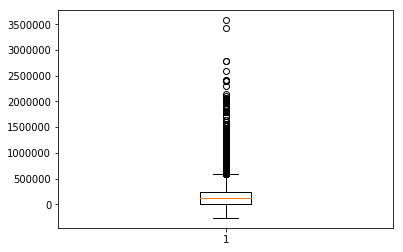

In [16]:
plt.boxplot(train['Manager_Business'])

In [17]:
Q1=train["Manager_Business"].quantile(0.25)
Q2=train["Manager_Business"].quantile(0.5)
Q3=train["Manager_Business"].quantile(0.75)
Q4=train["Manager_Business"].quantile(1)
IQR=Q3-Q1

In [18]:
B1=Q3+1.5*IQR
B1

582282.5

In [19]:
# Replacing outliers by mean. Also check by replacing with median.
train.loc[train['Manager_Business']>B1, 'Manager_Business']=np.mean(train['Manager_Business'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f1d334cae80>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1d334ce7b8>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1d334cacf8>],
 'medians': [<matplotlib.lines.Line2D at 0x7f1d2f8e6c88>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f1d2f882cc0>],
 'means': []}

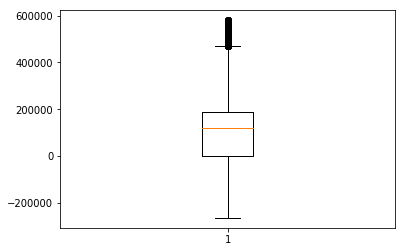

In [20]:
plt.boxplot(train['Manager_Business'])

# For Manager_Business2

{'whiskers': [<matplotlib.lines.Line2D at 0x7f1d2f866ac8>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1d2f8713c8>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1d2f866978>],
 'medians': [<matplotlib.lines.Line2D at 0x7f1d2f871c18>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f1d2f879080>],
 'means': []}

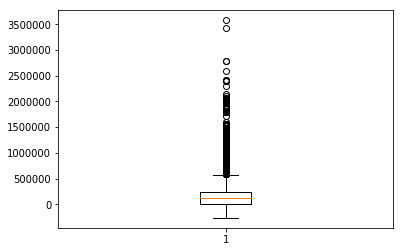

In [21]:
plt.boxplot(train['Manager_Business2'])

In [22]:
Q1=train["Manager_Business2"].quantile(0.25)
Q2=train["Manager_Business2"].quantile(0.5)
Q3=train["Manager_Business2"].quantile(0.75)
Q4=train["Manager_Business2"].quantile(1)
IQR=Q3-Q1

In [23]:
B2=Q3+1.5*IQR
B2

578800.0

In [24]:
# Replacing outliers by mean. Also check by replacing with median.
train.loc[train['Manager_Business2']>B1, 'Manager_Business2']=np.mean(train['Manager_Business2'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f1d2f7d1748>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1d2f7dd048>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1d2f7d15f8>],
 'medians': [<matplotlib.lines.Line2D at 0x7f1d2f7dd898>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f1d2f7ddcc0>],
 'means': []}

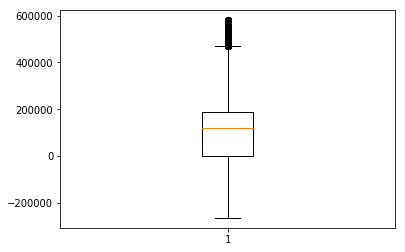

In [25]:
plt.boxplot(train['Manager_Business2'])

# For Manager_Num_Products

{'whiskers': [<matplotlib.lines.Line2D at 0x7f1d2f7ad1d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1d2f7ada90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1d2f7ad080>],
 'medians': [<matplotlib.lines.Line2D at 0x7f1d2f7b5320>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f1d2f7b5748>],
 'means': []}

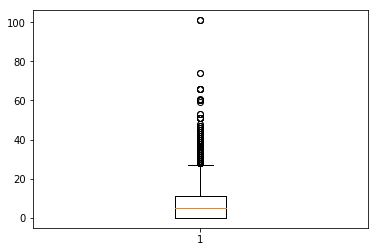

In [26]:
plt.boxplot(train['Manager_Num_Products'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f1d2f701a20>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1d2f70b320>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1d2f7018d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f1d2f70bb70>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f1d2f70bf98>],
 'means': []}

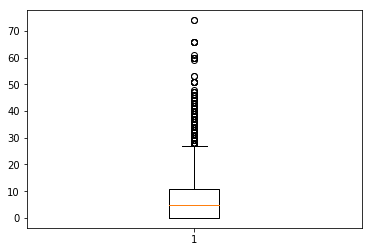

In [27]:
train.loc[train['Manager_Num_Products']>80, 'Manager_Num_Products']=np.mean(train['Manager_Num_Products'])
plt.boxplot(train['Manager_Num_Products'])

# For Manager_Num_Products2

{'whiskers': [<matplotlib.lines.Line2D at 0x7f1d2f6e44a8>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1d2f6e4d68>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1d2f6e4358>],
 'medians': [<matplotlib.lines.Line2D at 0x7f1d2f6eb5f8>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f1d2f6eba20>],
 'means': []}

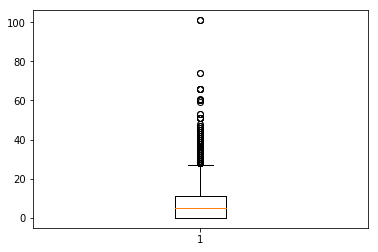

In [28]:
plt.boxplot(train['Manager_Num_Products2'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f1d2f6b7d30>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1d2f643630>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1d2f6b7be0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f1d2f643e80>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f1d2f64a2e8>],
 'means': []}

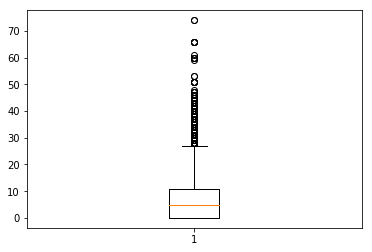

In [29]:
#keep changing values
train.loc[train['Manager_Num_Products2']>80, 'Manager_Num_Products2']=np.mean(train['Manager_Num_Products2'])
plt.boxplot(train['Manager_Num_Products2'])

# CHECK FOR Manager_Num_Application Manager_Num_Coded ALSO

# Training Model

In [30]:
#importing decision tree classifier 

from sklearn.tree import DecisionTreeClassifier

In [31]:
clf = DecisionTreeClassifier()

In [32]:
x_train = train.drop(['Business_Sourced','Application_Receipt_Date','Applicant_BirthDate','Manager_DOJ','Manager_DoB'],axis=1)
y_train = train["Business_Sourced"]

In [33]:
test = test.drop(['Application_Receipt_Date','Applicant_BirthDate','Manager_DOJ','Manager_DoB'], axis=1)

In [34]:
clf.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [35]:
clf.score(x_train,y_train)

0.9913928833840664

In [36]:
prediction=clf.predict(test)
data = {"ID":test.index, "Business_Sourced":prediction}
outdata = pd.DataFrame(data)

outdata["Business_Sourced"].value_counts()

0    3277
1    1768
Name: Business_Sourced, dtype: int64

In [37]:
outdata.to_csv("sample_submission.csv", index=False)